In [1]:
import pandas as pd

df_retail = pd.read_excel('../datasets/Online Retail.xlsx', index_col=0, engine='openpyxl')
df_retail.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Save DataFrame to Pickle
df_retail.to_pickle('../pickles/df_retail.pkl')

In [7]:
df_retail = pd.read_pickle('../pickles/df_retail.pkl')
df_retail.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df_transactions = df_retail.filter(['InvoiceNo', 'StockCode', 'Description'], axis=1)
df_transactions.head()

,StockCode,Description
InvoiceNo,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
536365,71053,WHITE METAL LANTERN
536365,84406B,CREAM CUPID HEARTS COAT HANGER
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [9]:
df_txns = df_transactions.dropna(subset=['Description'])

In [10]:
df_txns.head()

,StockCode,Description
InvoiceNo,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
536365,71053,WHITE METAL LANTERN
536365,84406B,CREAM CUPID HEARTS COAT HANGER
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [13]:
print(f'Total items in df_txns: {len(df_txns)}')

Total items in df_txns: 540455


In [14]:
df_txns = df_txns.astype({'Description': 'str'})

In [15]:
txns = df_txns.groupby(['InvoiceNo'])['Description'].apply(list).to_list()
print(len(txns))

24446


In [16]:
display(txns)

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE BEDROOM ",
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'IVORY KNITTED MUG COSY ',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  'DOORMAT NEW ENGLAND'],
 ['JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD'],
 ['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED ',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET'

With the list of Transactions filled with items, the items can now be encoded into a boolean matrix to find matches.

In [17]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
encoded_array = encoder.fit(txns).transform(txns)
df_itemsets = pd.DataFrame(encoded_array, columns=encoder.columns_)

display(df_itemsets)

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24441,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24442,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24443,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24444,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Use `apriori` algorithm with `min_support` of `0.025` to generate frequent itemsets

In [18]:
from mlxtend.frequent_patterns import apriori

# Apriori will omit with less than 0.25% of occurrence
ITEMSETS_RATIO=0.025

frequent_itemsets = apriori(df_itemsets, min_support=ITEMSETS_RATIO, use_colnames=True)
display(frequent_itemsets)

,support,itemsets
0,0.039311,(6 RIBBONS RUSTIC CHARM)
1,0.025444,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.034198,(60 TEATIME FAIRY CAKE CASES)
3,0.025321,(72 SWEETHEART FAIRY CAKE CASES)
4,0.040947,(ALARM CLOCK BAKELIKE GREEN)
...,...,...
131,0.027939,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
132,0.029984,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)"
133,0.026507,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU..."
134,0.025076,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA..."


With itemsets found association rules can be determinated, the metric "confidence" is used with a `min_threshold` of `0.25`

In [26]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.025)
display(rules)
print(f'Rules found are: {len(rules)}')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.044220,0.040947,0.026426,0.597595,14.594209,0.024615,2.383301,0.974575
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.040947,0.044220,0.026426,0.645355,14.594209,0.024615,2.695031,0.971250
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.032766,0.043238,0.026344,0.803995,18.594571,0.024927,4.881314,0.978275
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.043238,0.032766,0.026344,0.609272,18.594571,0.024927,2.475463,0.988983
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.045815,0.043238,0.032071,0.700000,16.189404,0.030090,3.189206,0.983280
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.043238,0.045815,0.032071,0.741722,16.189404,0.030090,3.694408,0.980632
6,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.087335,0.050356,0.034075,0.390164,7.748130,0.029677,1.557212,0.954279
7,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.050356,0.087335,0.034075,0.676686,7.748130,0.029677,2.822840,0.917119
8,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.048556,0.087335,0.027939,0.575400,6.588399,0.023698,2.149470,0.891506
9,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.087335,0.048556,0.027939,0.319906,6.588399,0.023698,1.398990,0.929386


Rules found are: 18


Reveal "Antecedent", "Consequent" and "Lift"

In [27]:
rules_plot = pd.DataFrame()
rules_plot['antecedents'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules_plot['consequents'] = rules['consequents'].apply(lambda x: ','.join(list(x)))
rules_plot['lift'] = rules['lift'].apply(lambda x: round(x, 2))

display(rules_plot)

,antecedents,consequents,lift
0,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,14.59
1,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,14.59
2,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,18.59
3,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,18.59
4,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,16.19
5,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,16.19
6,JUMBO BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT,7.75
7,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,7.75
8,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO BAG RED RETROSPOT,6.59
9,JUMBO BAG RED RETROSPOT,JUMBO SHOPPER VINTAGE RED PAISLEY,6.59


In [33]:
rules_plot = rules_plot.sort_values('lift', ascending=False)
display(rules_plot)

,antecedents,consequents,lift
2,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,18.59
3,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,18.59
17,PINK REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,16.73
16,ROSES REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,16.73
4,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,16.19
5,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,16.19
0,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,14.59
1,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,14.59
15,LUNCH BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT,8.40
14,LUNCH BAG RED RETROSPOT,LUNCH BAG PINK POLKADOT,8.40


In [34]:
pivot = rules_plot.pivot(index = 'antecedents', columns = 'consequents', values = 'lift')
display(pivot)

consequents,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,GREEN REGENCY TEACUP AND SAUCER,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO STORAGE BAG SUKI,LUNCH BAG BLACK SKULL.,LUNCH BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT,PINK REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER
antecedents,,,,,,,,,,,,
ALARM CLOCK BAKELIKE GREEN,NaN,14.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALARM CLOCK BAKELIKE RED,14.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GREEN REGENCY TEACUP AND SAUCER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.59,16.19
JUMBO BAG PINK POLKADOT,NaN,NaN,NaN,NaN,7.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JUMBO BAG RED RETROSPOT,NaN,NaN,NaN,7.75,NaN,6.59,6.99,NaN,NaN,NaN,NaN,NaN
JUMBO SHOPPER VINTAGE RED PAISLEY,NaN,NaN,NaN,NaN,6.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JUMBO STORAGE BAG SUKI,NaN,NaN,NaN,NaN,6.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LUNCH BAG BLACK SKULL.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.61,NaN,NaN
LUNCH BAG PINK POLKADOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.40,NaN,NaN


In [35]:
import numpy as np

antecedents = list(pivot.index.values)
consequents = list(pivot.columns)

pivot = pivot.to_numpy()

display(pivot)

array([[  nan, 14.59,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [14.59,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan, 18.59, 16.19],
       [  nan,   nan,   nan,   nan,  7.75,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [  nan,   nan,   nan,  7.75,   nan,  6.59,  6.99,   nan,   nan,
          nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,  6.59,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,  6.99,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         7.61,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         8.4 ,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,  7.61,  8.4 ,
          nan,   nan

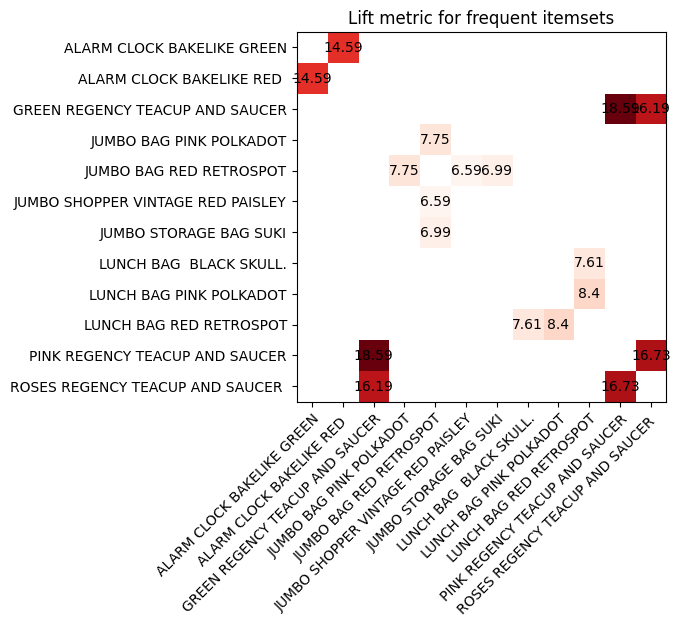

In [37]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(pivot, cmap = 'Reds')

ax.set_xticks(np.arange(len(consequents)))
ax.set_yticks(np.arange(len(antecedents)))
ax.set_xticklabels(consequents)
ax.set_yticklabels(antecedents)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
  rotation_mode="anchor")

for i in range(len(antecedents)):
    for j in range(len(consequents)):
        if not np.isnan(pivot[i, j]):
            text = ax.text(j, i, pivot[i, j], ha="center", va="center")

ax.set_title("Lift metric for frequent itemsets")
plt.show()